### Projeto classificando bebidas

Atributos:
- Bebidas: nome da bebida
- Volume (ml): Quantidade em volume
- Calorias: Quantidade de calorias
- Cafeína (mg): Quantidade de cafeína
- Tipo: Tipo de bebida. (Café, Bebida energética, Shot energético, Refrigerante, Chá e Água)

#### Importando as bibliotecas

In [76]:
# manipulação dos dados
import pandas as pd
import numpy as np

# bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# bibliotecas para machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

from imblearn.over_sampling import SMOTE


#### Carregando os dados

In [56]:
dados = pd.read_csv(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\caffeine.csv', sep=',')

In [57]:
# tamanho do df
dados.shape

(610, 5)

In [58]:
# exibindo o df
dados.head(3)

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee


#### Análise exploratória dos dados

In [59]:
# verificando os tipo de bebida
set(dados['type'])

{'Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea', 'Water'}

In [60]:
# verificando valores nulos
dados.isnull().sum().sum()

0

In [61]:
# verificando os tipos de dados
dados.dtypes

drink             object
Volume (ml)      float64
Calories           int64
Caffeine (mg)      int64
type              object
dtype: object

Verificando as distribuições

In [62]:
# definindo função para plot de vários gráficos com mais velocidade
def plot_graficos(df, coluna):
    # definindo tamanho da figura e dos eixos
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

    # grafico 1
    sns.histplot(data=df, x=coluna, ax=ax[0])

    #grafico 2
    sns.boxplot(data=dados, x=coluna, ax=ax[1], color='lightgray')
    sns.violinplot(data=dados, x=coluna, ax=ax[1],color='lightblue')

    plt.tight_layout()
    plt.show()

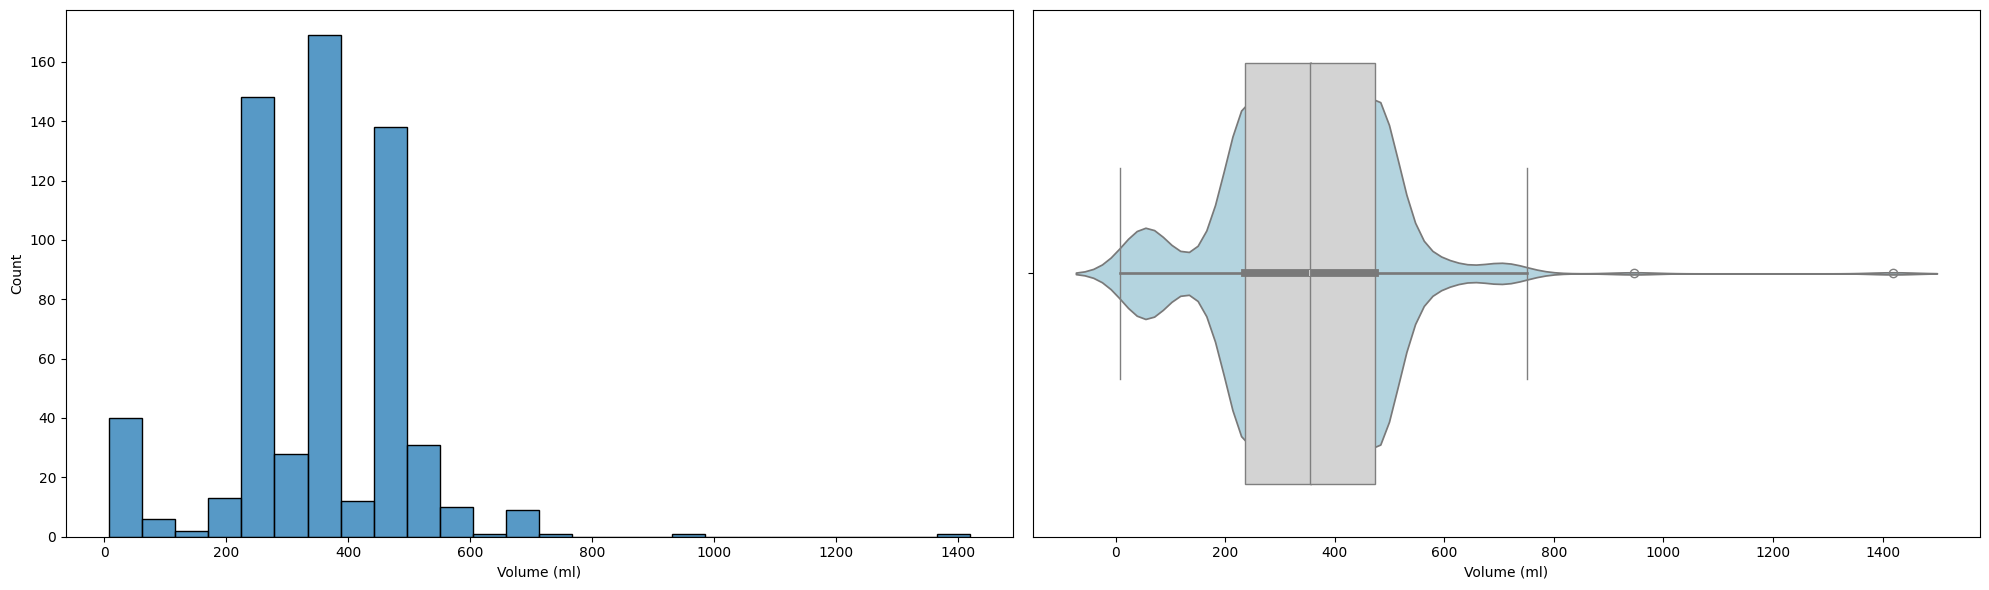

In [63]:
plot_graficos(dados, dados['Volume (ml)'])

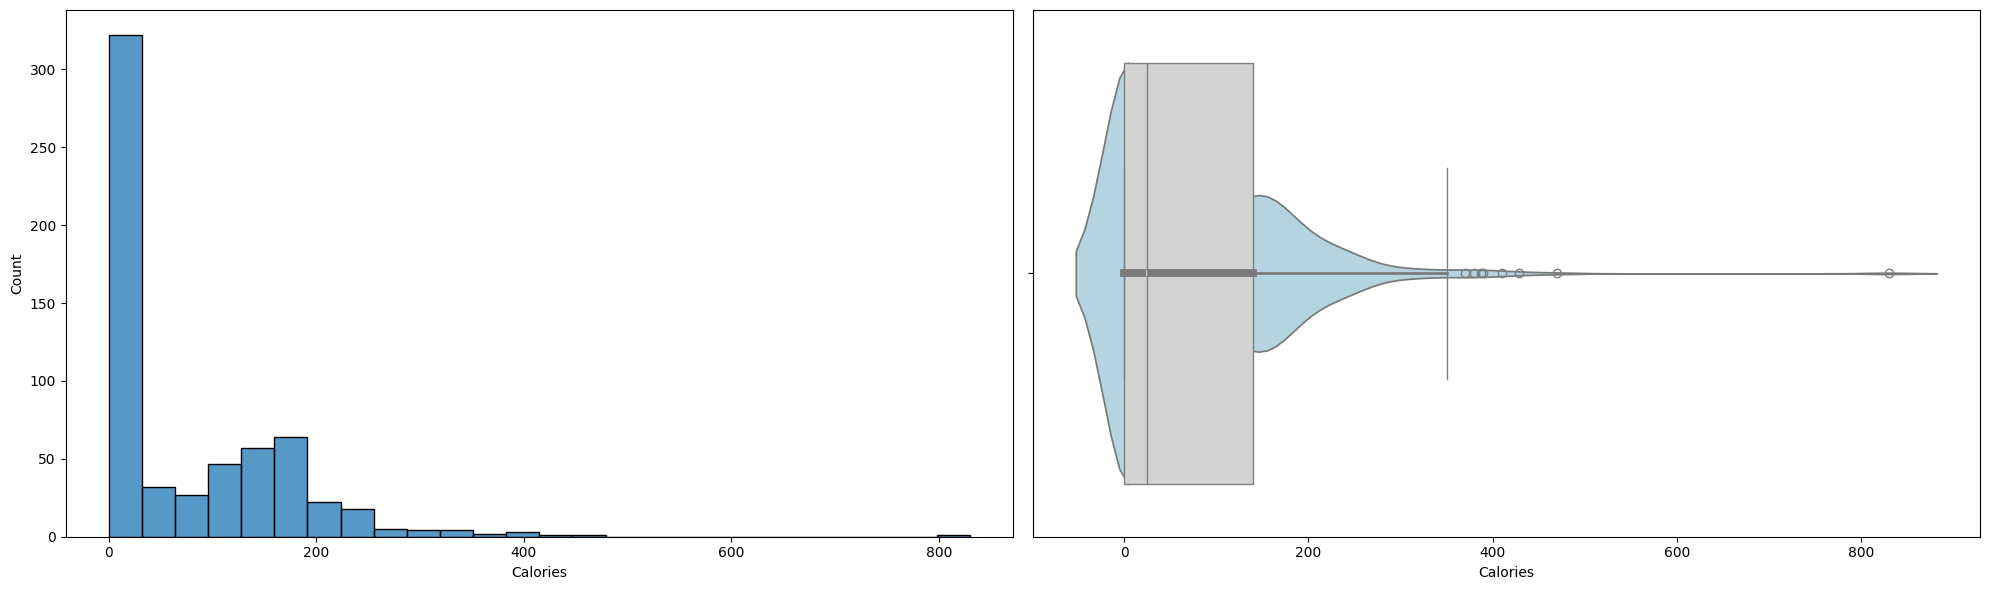

In [64]:
plot_graficos(dados, dados['Calories'])

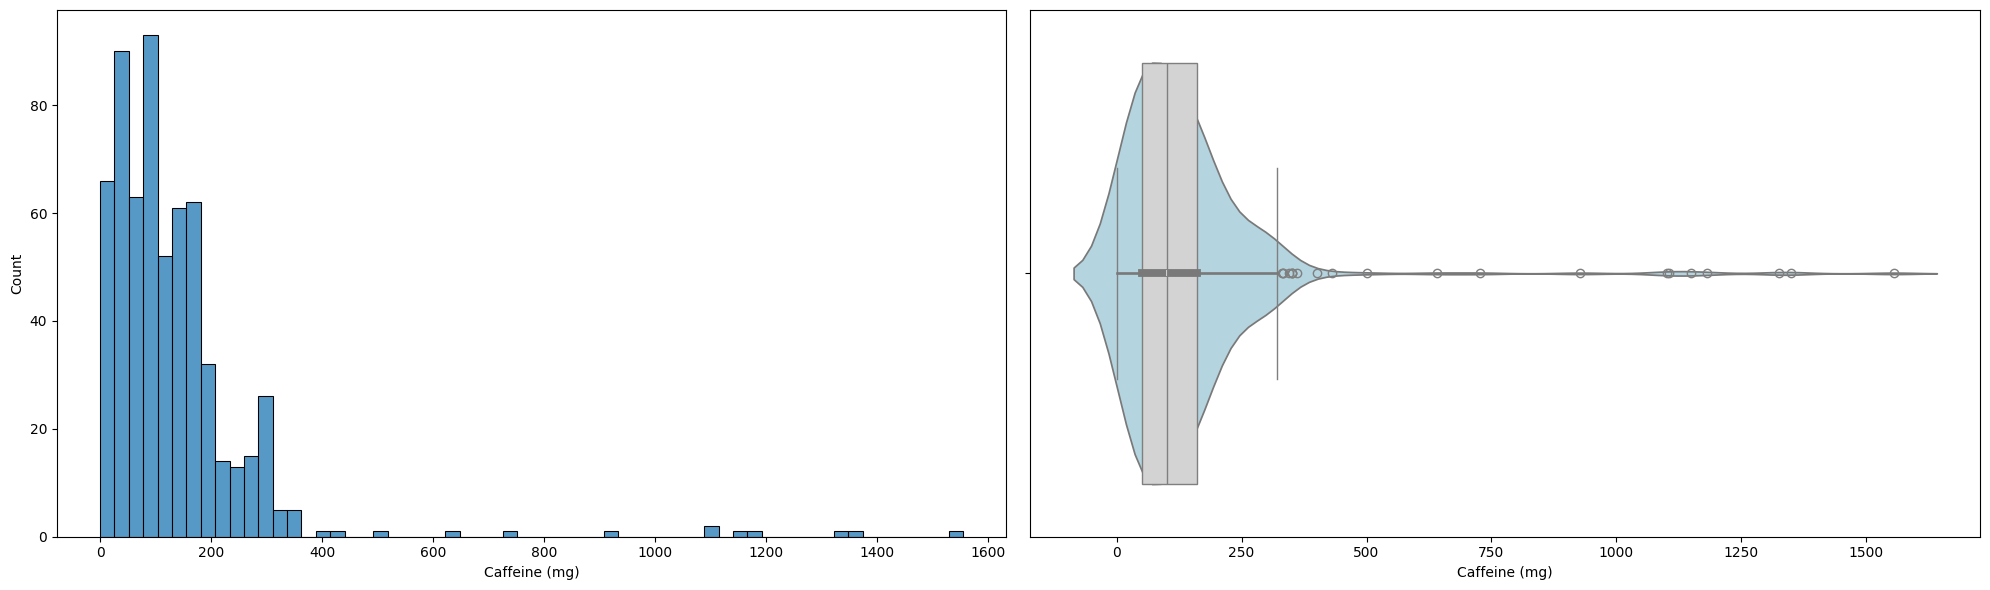

In [65]:
plot_graficos(dados, dados['Caffeine (mg)'])

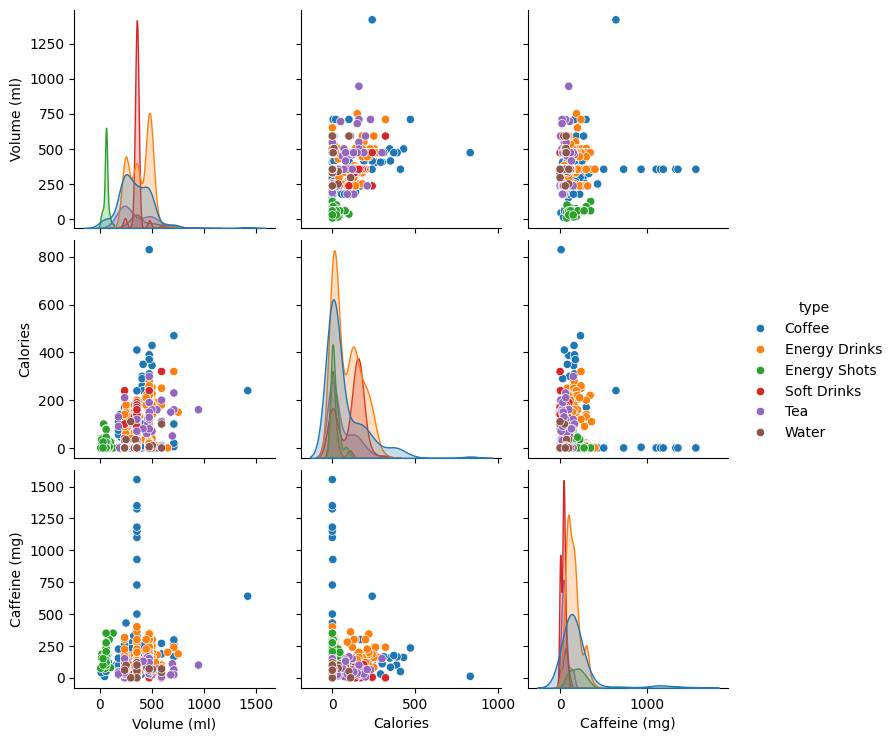

In [66]:
sns.pairplot(dados, vars=['Volume (ml)', 'Calories', 'Caffeine (mg)'], hue='type')

#### Criando o modelo

In [67]:
# separando os dados
x = dados.drop(columns=['type', 'drink'])
y = dados['type']

# separando os dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [68]:
# instanciando o modelo
dt = DecisionTreeClassifier(random_state=7, criterion='gini', max_depth=3)

In [69]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [70]:
y_pred = dt.predict(x_test)

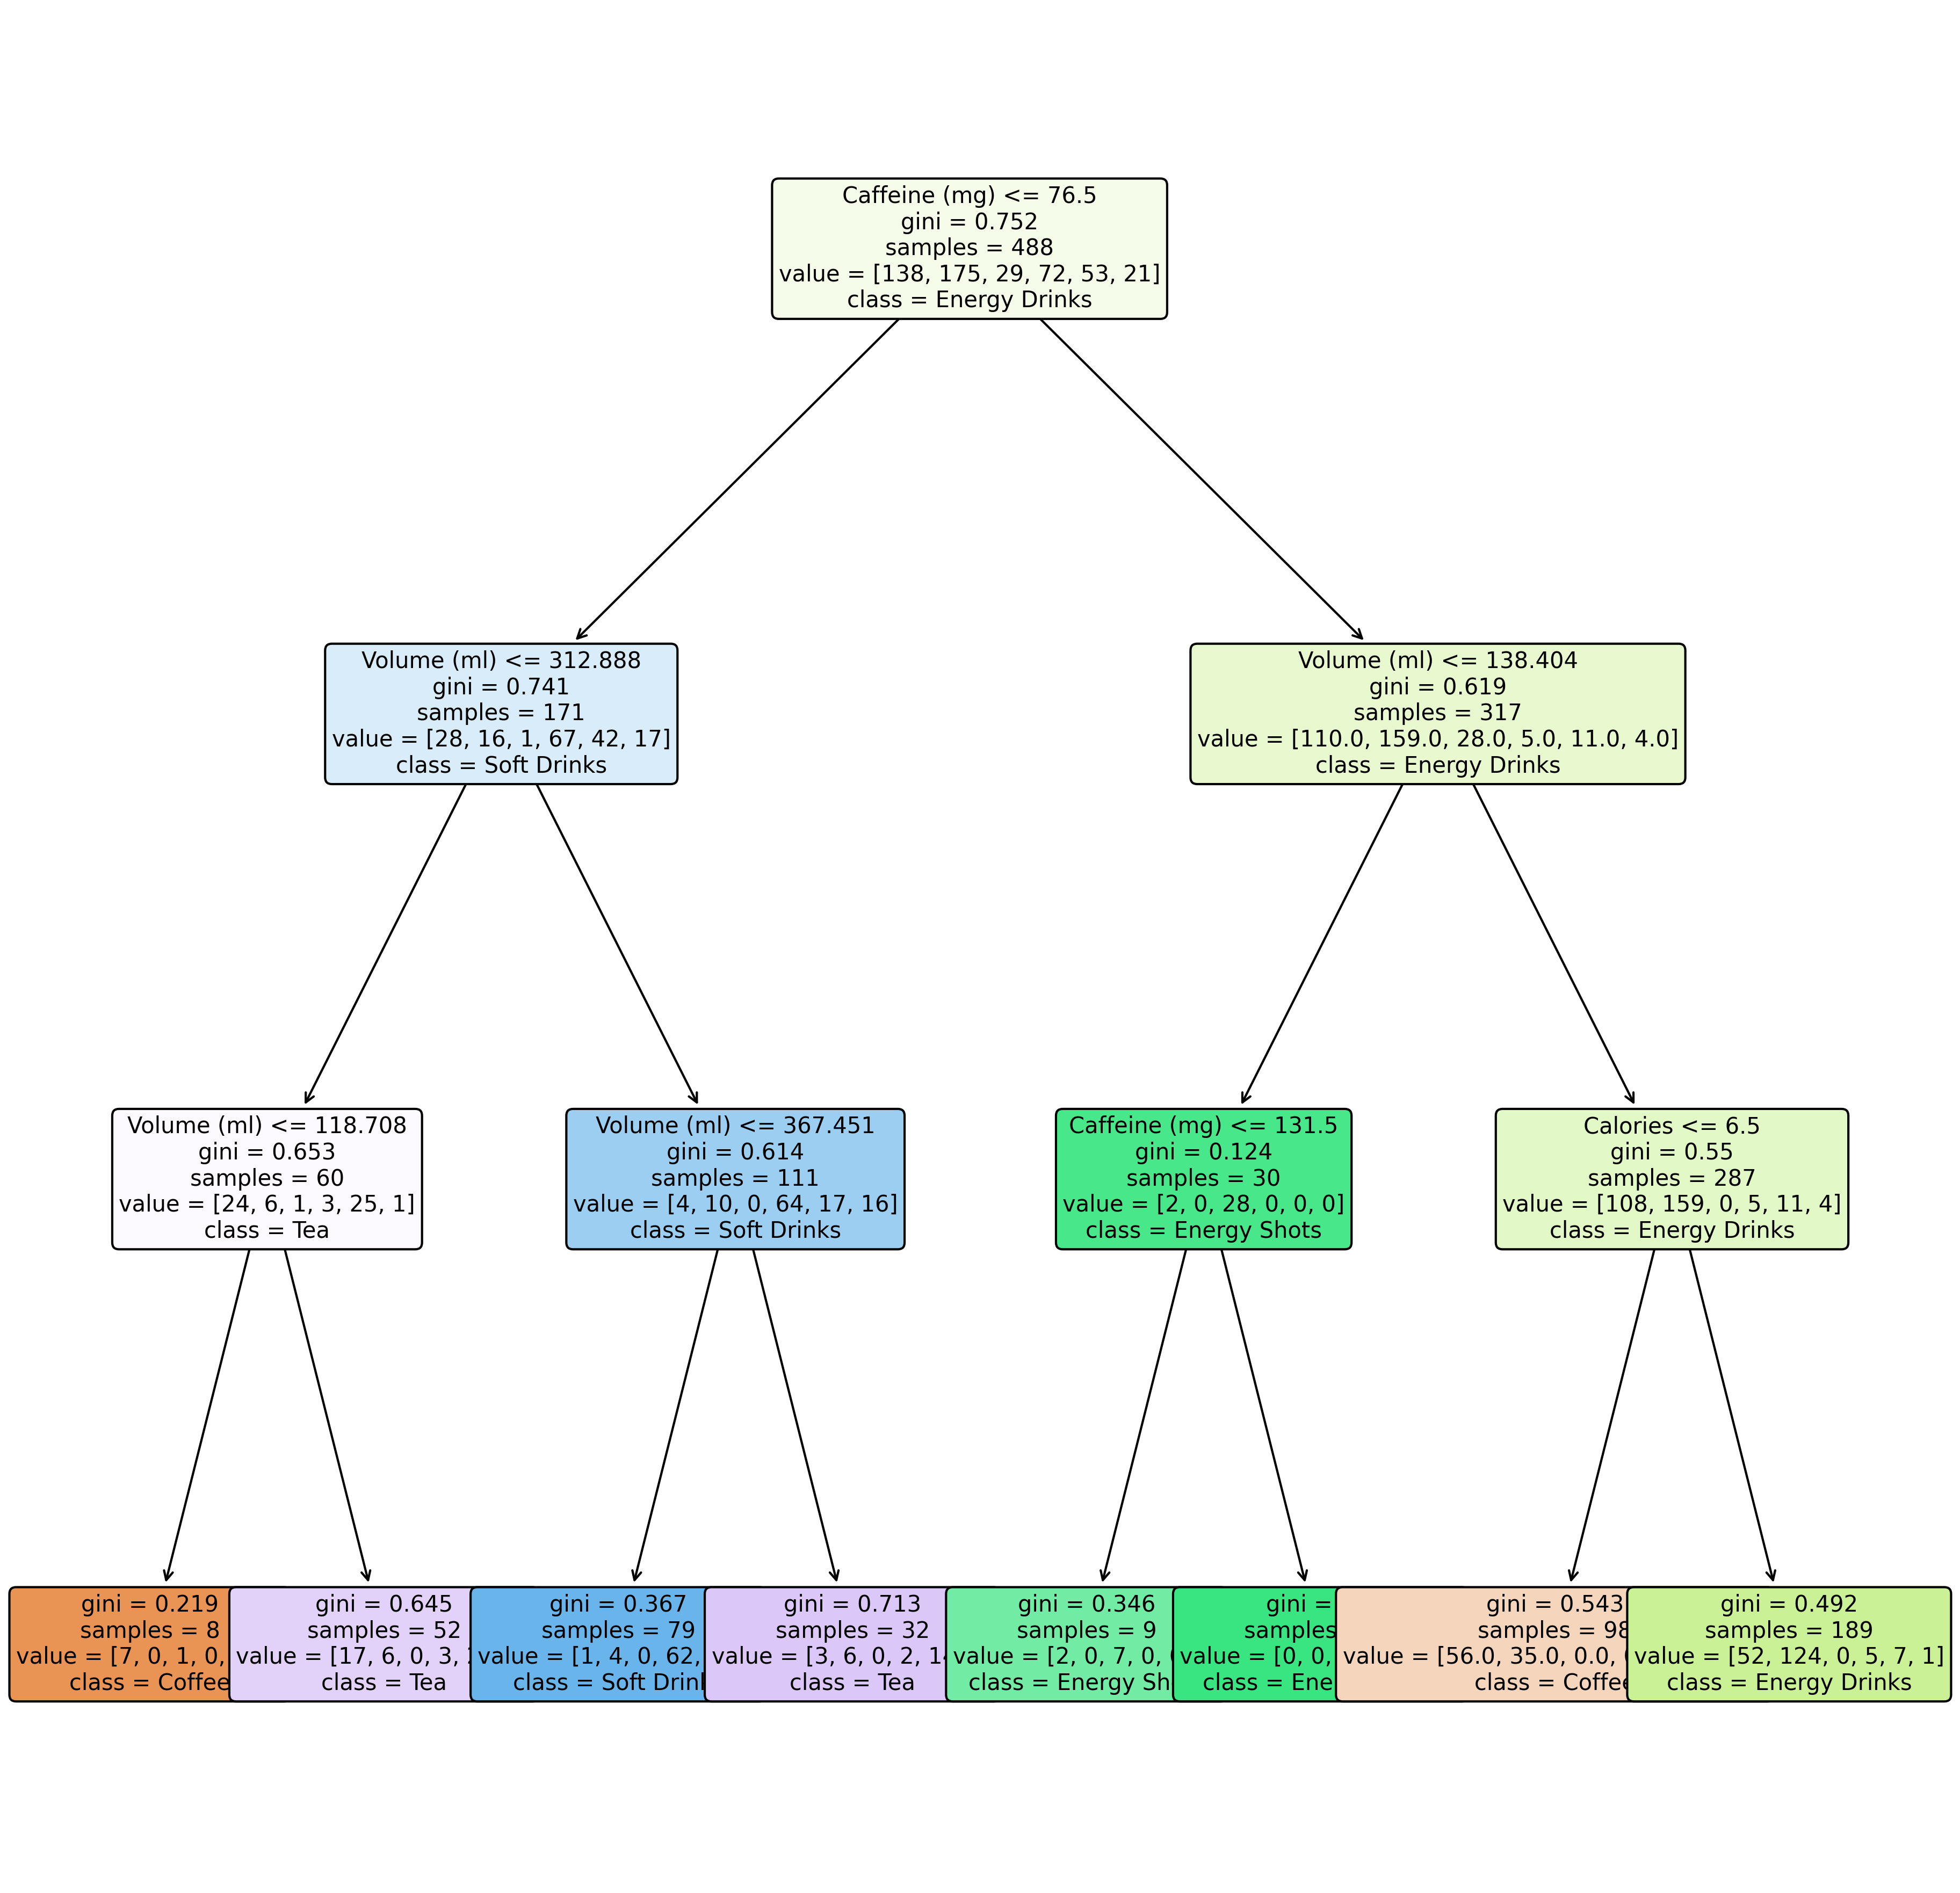

In [71]:
class_names = ['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea', 'Water']
labels_names = ['Volume (ml)', 'Calories', 'Caffeine (mg)']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=300)

tree.plot_tree(dt, feature_names=labels_names, class_names=class_names, filled=True, rounded=True, fontsize=10)

plt.show()

#### Avaliando o modelo

In [72]:
# Metricas de precisao, revocação, f-1 score e acurácia
print(accuracy_score(y_test, y_pred))

0.6557377049180327


In [73]:
dados['type'].value_counts()

type
Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: count, dtype: int64

Se as variáveis target do seu modelo de decision tree não estão equilibradas, isso pode afetar a precisão e a acurácia do seu modelo, especialmente se a classe minoritária é importante para o seu problema.

Utilize algoritmos que são robustos a desequilíbrios de classe: Alguns algoritmos de machine learning são projetados para serem robustos a desequilíbrios de classe. Alguns exemplos incluem o Random Forests.

Existem algumas técnicas que podem ser usadas para equilibrar classes com um modelo de Random Forest. Duas abordagens comuns são o ajuste do parâmetro class_weight e a aplicação de técnicas de reamostragem.

O parâmetro class_weight permite atribuir pesos diferentes às classes no modelo de Random Forest. Ele pode ser ajustado para dar mais peso às classes minoritárias, ajudando a equilibrar o modelo. Você pode definir o valor do parâmetro "class_weight" como "balanced", o que fará com que o modelo ajuste automaticamente os pesos de acordo com a frequência de cada classe.

Técnicas de reamostragem: Outra abordagem comum é usar técnicas de reamostragem, como oversampling e undersampling, para equilibrar as classes. Oversampling envolve a duplicação ou triplicação de observações da classe minoritária, enquanto undersampling envolve a redução do número de observações da classe majoritária. Isso ajuda a garantir que o modelo seja treinado com um número igual de observações para cada classe.

Você pode experimentar essas técnicas individualmente ou combiná-las para obter melhores resultados em termos de equilíbrio de classes em seu modelo de Random Forest. É importante lembrar que o ajuste correto de hiperparâmetros é fundamental para obter bons resultados em qualquer modelo de machine learning.

In [77]:
# aplicar SMOTE para oversampling da classe minoritária
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train, y_train)

Nesse exemplo, SMOTE é utilizado para gerar dados sintéticos e equilibrar as classes antes de ajustar o modelo de Random Forest. Note que o método fit_resample é utilizado para aplicar o oversampling na classe minoritária. Por fim, o modelo é avaliado com a métrica de acurácia no conjunto de teste.

Oversampling envolve a criação de mais exemplos para a classe minoritária, aumentando sua representação no conjunto de dados. As técnicas comuns de oversampling incluem a replicação de exemplos existentes (cópia de exemplos da classe minoritária), a geração sintética de novos exemplos com base em exemplos existentes, como a técnica SMOTE (Synthetic Minority Over-sampling Technique), ou a combinação de ambas as abordagens.

In [78]:
x_train.shape

(488, 3)

In [79]:
x_train_os.shape

(1050, 3)

In [81]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=80, max_depth=7, class_weight='balanced', random_state=7)

rf.fit(x_train_os, y_train_os)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, n_estimators=80, random_state=7)

In [82]:
y_pred_rf = rf.predict(x_test)

In [83]:
print(accuracy_score(y_test, y_pred_rf))

0.7213114754098361


In [84]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.8647540983606558
0.7213114754098361
